## Homework 4 - Visualizing Fire Scars Through False Color - Pt 1

Author: Eva Newby

Website for instructions: https://meds-eds-220.github.io/MEDS-eds-220-course/assignments/assignment4.html

Link to my github repository: https://github.com/evajnewby/eds220-hwk4

Rubric: https://docs.google.com/document/d/1-Zm731BLVCs1MXHT5R1H9rr6uvcwHnMZQ2q8xkQ_fWM/edit?tab=t.0

Added data folder to gitignore

## Fire perimeter data retrieval and selection

In [1]:
# Load Packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

In [2]:
# Get current working directory
os.getcwd()

'/Users/ejnewby/MEDS/EDS-220/eds220-hwk4'

In [3]:
# Read in California fire perimeter data
fp = os.path.join('/', 'Users', 'ejnewby', 'MEDS', 'EDS-220', 'eds220-hwk4', 'data','California_Fire_Perimeters_(all)[1].shp')
ca_fires= gpd.read_file(fp)

### Explore and clean up the ca_fires gdf

In [4]:
# View the first 3 rows of fires df
ca_fires.head(3)

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."


In [5]:
# Column data types of ca_fires
ca_fires.dtypes

YEAR_            int64
STATE           object
AGENCY          object
UNIT_ID         object
FIRE_NAME       object
INC_NUM         object
ALARM_DATE      object
CONT_DATE       object
CAUSE            int64
C_METHOD         int64
OBJECTIVE        int64
GIS_ACRES      float64
COMMENTS        object
COMPLEX_NA      object
IRWINID         object
FIRE_NUM        object
COMPLEX_ID      object
DECADES          int64
geometry      geometry
dtype: object

In [6]:
# ca_fires df info
ca_fires.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22261 entries, 0 to 22260
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   YEAR_       22261 non-null  int64   
 1   STATE       22261 non-null  object  
 2   AGENCY      22208 non-null  object  
 3   UNIT_ID     22194 non-null  object  
 4   FIRE_NAME   15672 non-null  object  
 5   INC_NUM     21286 non-null  object  
 6   ALARM_DATE  22261 non-null  object  
 7   CONT_DATE   22261 non-null  object  
 8   CAUSE       22261 non-null  int64   
 9   C_METHOD    22261 non-null  int64   
 10  OBJECTIVE   22261 non-null  int64   
 11  GIS_ACRES   22261 non-null  float64 
 12  COMMENTS    2707 non-null   object  
 13  COMPLEX_NA  596 non-null    object  
 14  IRWINID     2695 non-null   object  
 15  FIRE_NUM    17147 non-null  object  
 16  COMPLEX_ID  360 non-null    object  
 17  DECADES     22261 non-null  int64   
 18  geometry    22261 non-null  geometry
d

In [7]:
# Simplify ca_fires column names
ca_fires.columns = ca_fires.columns.str.lower().str.replace(' ', '_')

In [8]:
# Filter to Thomas fire
thomas = ca_fires[ca_fires['fire_name'] == 'THOMAS']

In [9]:
# View Thomas gdf info
thomas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5 entries, 2654 to 14279
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year_       5 non-null      int64   
 1   state       5 non-null      object  
 2   agency      5 non-null      object  
 3   unit_id     5 non-null      object  
 4   fire_name   5 non-null      object  
 5   inc_num     5 non-null      object  
 6   alarm_date  5 non-null      object  
 7   cont_date   5 non-null      object  
 8   cause       5 non-null      int64   
 9   c_method    5 non-null      int64   
 10  objective   5 non-null      int64   
 11  gis_acres   5 non-null      float64 
 12  comments    1 non-null      object  
 13  complex_na  0 non-null      object  
 14  irwinid     0 non-null      object  
 15  fire_num    3 non-null      object  
 16  complex_id  0 non-null      object  
 17  decades     5 non-null      int64   
 18  geometry    5 non-null      geometry
dtypes:

In [10]:
# Find CRS of thomas gdf
thomas.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

`thomas` df is projected CRS: EPSG 3857

In [11]:
# View Thomas gdf first 3 rows
thomas.head(3)

,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_na,irwinid,fire_num,complex_id,decades,geometry
2654,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,9,7,1,281791.0000,CONT_DATE based on Inciweb,None,None,None,None,2010,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."
3937,2013,CA,CDF,RRU,THOMAS,00007015,2013-11-09,2013-11-09,10,1,1,27.8195,None,None,None,None,None,2010,"MULTIPOLYGON (((-13009051.743 3968808.886, -13..."
10859,1985,CA,USF,CNF,THOMAS,00000000,1985-10-04,1985-10-07,9,8,1,1181.9800,None,None,None,00000082,None,1980,"POLYGON ((-13066745.713 3951653.325, -13066679..."


<Axes: >

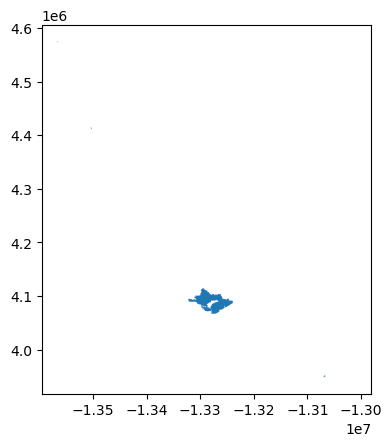

In [12]:
# Plot the Thomas fire gdf
thomas.plot()

Write a brief summary of the information you obtained from the preliminary information. Your summary should include the CRS of the data and whether this is projected or geographic

Briefly explain your reasoning for selecting that specific file format.

I chose the shapefile data from data.gov, as this was one of the first websites I found that was not through an ESRI platform. I chose to upload the shapefiles as this is what I had used in the past while working, and wanted more practice with what I had experienced in the industry.